___


___
# **Olympic Champions Predictor**

# Load and Merge the Data

---

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
teams = pd.read_excel('data_olympics/Teams.xlsx')
medals = pd.read_excel('data_olympics//Medals.xlsx')
athletes = pd.read_excel('data_olympics/Athletes.xlsx')
coaches = pd.read_excel('data_olympics/Coaches.xlsx')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [31]:
# Check how many teams participate for each country
country_counts = teams['country'].value_counts().reset_index()
print(country_counts)
country_counts.columns = ['country', 'team_count']

                     country  count
0                      Japan     48
1   United States of America     47
2                      Italy     37
3                    Germany     36
4                  Australia     35
..                       ...    ...
79                   Vietnam      1
80       Republic of Moldova      1
81                  Malaysia      1
82                Bangladesh      1
83                 Venezuela      1

[84 rows x 2 columns]


In [32]:
merged_data = pd.merge(medals, country_counts, on='country', how= "left")
merged_data.shape
# merged_data.isna().sum()

(93, 8)

**Adding Country Name and Team Count**

In [33]:
# Check how many teams participate for each country
athletes_counts = athletes['country'].value_counts().reset_index()
print(athletes_counts)
athletes_counts.columns = ['country', 'athletes_count']

                         country  count
0       United States of America    615
1                          Japan    586
2                      Australia    470
3     People's Republic of China    401
4                        Germany    400
..                           ...    ...
201  United Republic of Tanzania      2
202        Saint Kitts and Nevis      2
203             Marshall Islands      2
204                      Vanuatu      2
205                  South Sudan      2

[206 rows x 2 columns]


In [34]:
merged_data = pd.merge(merged_data, athletes_counts, on='country', how ="left")
# merged_data.head()
merged_data.shape

(93, 9)

**Adding Coaches Count**

In [35]:
# Check how many teams participate for each country
coaches_counts = coaches['NOC'].value_counts().reset_index()
coaches_counts.columns = ['country', 'coaches_count']

In [36]:
merged_data = pd.merge(merged_data, coaches_counts, on='country', how ="left")
merged_data.shape

(93, 10)

**Adding GDP-related Information**

In [37]:
gdp = pd.read_csv('data_olympics/gdp.csv')
gdp.head()
# gdp.shape

,population,id,imfGDP,unGDP,country,gdpPerCapita,continent,rank
0,341814420,840,2.878108e+13,25744100000000,United States,84200.894743,North America,1
1,1425178782,156,1.853263e+13,17963170521080,China,13003.722925,Asia,2
2,83252474,276,4.591100e+12,4076923618912,Germany,55146.709514,Europe,3
3,122631432,392,4.110450e+12,4232173916087,Japan,33518.731152,Asia,4
4,1441719852,356,3.937010e+12,3465541446546,India,2730.773246,Asia,5


In [38]:
gdp_subset = gdp[['country', 'gdpPerCapita', 'imfGDP']]

# Define a dictionary to map old country names to new names
country_name_mapping = {
    'United States': 'United States of America',
    'Mexico': "People's Republic of China",
    'United Kingdom':'Great Britain',
    'North Korea':'Republic of Korea',
    'Iran':'Islamic Republic of Iran'
}

# Drop rows where country is 'ROC' or "Côte d'Ivoire'
countries_to_drop = ['ROC', "Côte d'Ivoire"]
gdp_subset = gdp[~gdp['country'].isin(countries_to_drop)]

# Change names of countries in gdp_subset DataFrame using the dictionary
gdp_subset['country'] = gdp_subset['country'].replace(country_name_mapping)

# Display updated gdp_subset DataFrame
print("\nUpdated gdp_subset DataFrame:")
print(gdp_subset)


Updated gdp_subset DataFrame:
     population   id        imfGDP           unGDP                   country  \
0     341814420  840  2.878108e+13  25744100000000  United States of America   
1    1425178782  156  1.853263e+13  17963170521080                     China   
2      83252474  276  4.591100e+12   4076923618912                   Germany   
3     122631432  392  4.110450e+12   4232173916087                     Japan   
4    1441719852  356  3.937010e+12   3465541446546                     India   
..          ...  ...           ...             ...                       ...   
207      295966  540  0.000000e+00      9623318699             New Caledonia   
208   245209815  586  0.000000e+00    326796632109                  Pakistan   
209       15936  660  0.000000e+00       452896296                  Anguilla   
210    24348053  760  0.000000e+00     18595794717                     Syria   
211       46431  796  0.000000e+00      1138808881  Turks and Caicos Islands   

     gdp

In [39]:
merged_data = pd.merge(merged_data, gdp_subset, on='country', how='left')
merged_data.shape

(93, 17)

**Add Total population**

In [40]:
# Calculate total population
merged_data['total_population'] = merged_data['imfGDP'] / merged_data['gdpPerCapita']
merged_data.head()

,Rank,country,Gold,Silver,Bronze,Total,Rank by Total,team_count,athletes_count,coaches_count,population,id,imfGDP,unGDP,gdpPerCapita,continent,rank,total_population
0,1,United States of America,39,41,33,113,1,47.0,615,28.0,341814420.0,840.0,2.878108e+13,2.574410e+13,84200.894743,North America,1.0,341814420.0
1,2,People's Republic of China,38,32,18,88,2,33.0,401,12.0,129388467.0,484.0,2.017030e+12,1.463324e+12,15588.947352,North America,12.0,129388467.0
2,3,Japan,27,14,17,58,5,48.0,586,35.0,122631432.0,392.0,4.110450e+12,4.232174e+12,33518.731152,Asia,4.0,122631432.0
3,4,Great Britain,22,21,22,65,4,28.0,366,7.0,67961439.0,826.0,3.495260e+12,3.089073e+12,51430.046971,Europe,6.0,67961439.0
4,5,ROC,20,28,23,71,3,34.0,318,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
new_column_names = {
    'Gold': 'gold',
    'Silver': 'silver',
    'Bronze': 'bronze',
    'Total': 'total',
    'team_count': 'team_count',
    'athletes_count': 'athletes_count',
    'coaches_count': 'coaches_count',
    'Rank by Total': 'rank_total',
    'Rank': 'rank',
    'imfGDP': 'gdp',
}
# Rename columns
df = merged_data.rename(columns=new_column_names)
df.head(10)

,rank,country,gold,silver,bronze,total,rank_total,team_count,athletes_count,coaches_count,population,id,gdp,unGDP,gdpPerCapita,continent,rank,total_population
0,1,United States of America,39,41,33,113,1,47.0,615,28.0,341814420.0,840.0,2.878108e+13,2.574410e+13,84200.894743,North America,1.0,341814420.0
1,2,People's Republic of China,38,32,18,88,2,33.0,401,12.0,129388467.0,484.0,2.017030e+12,1.463324e+12,15588.947352,North America,12.0,129388467.0
2,3,Japan,27,14,17,58,5,48.0,586,35.0,122631432.0,392.0,4.110450e+12,4.232174e+12,33518.731152,Asia,4.0,122631432.0
3,4,Great Britain,22,21,22,65,4,28.0,366,7.0,67961439.0,826.0,3.495260e+12,3.089073e+12,51430.046971,Europe,6.0,67961439.0
4,5,ROC,20,28,23,71,3,34.0,318,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Australia,17,7,22,46,6,35.0,470,22.0,26699482.0,36.0,1.790350e+12,1.776577e+12,67055.608045,Oceania,13.0,26699482.0
6,7,Netherlands,10,12,14,36,9,27.0,274,10.0,17671125.0,528.0,1.142510e+12,1.008027e+12,64654.061357,Europe,17.0,17671125.0
7,8,France,10,12,11,33,10,33.0,377,10.0,64881830.0,250.0,3.130010e+12,2.775317e+12,48241.703417,Europe,7.0,64881830.0
8,9,Germany,10,11,16,37,8,36.0,400,9.0,83252474.0,276.0,4.591100e+12,4.076924e+12,55146.709514,Europe,3.0,83252474.0
9,10,Italy,10,10,20,40,7,37.0,356,14.0,58697744.0,380.0,2.328030e+12,2.046953e+12,39661.319863,Europe,9.0,58697744.0


# Exploratory Data Analysis

---

**Exploring Number of Athletes**

/var/folders/k9/pf_5mp0d6ng9y74z5ydlgz4c0000gn/T/ipykernel_44764/1082677024.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top40, x='country', y='athletes_count', order=order, palette='Purples_d')


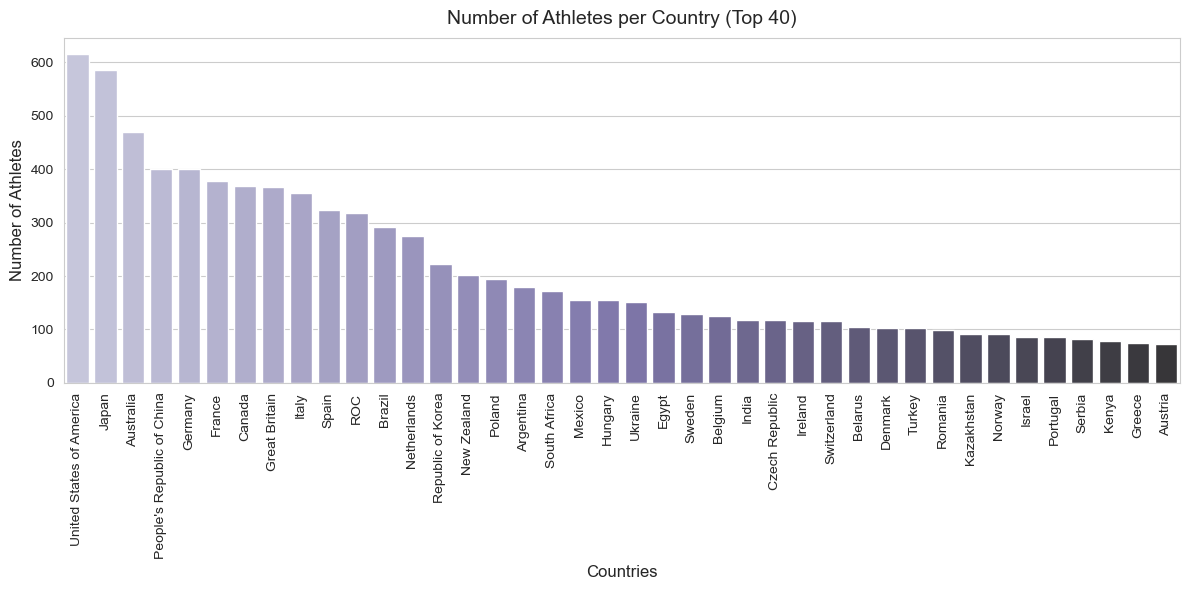

In [43]:
# Set style
sns.set_style('whitegrid')

# Filter the top 40 countries by athletes_count
df_top40 = df.sort_values('athletes_count', ascending=False).head(40)

# Set the figure size
plt.figure(figsize=(12, 6))

# Order countries by athletes_count in decreasing order within the top 40
order = df_top40['country']

# Create the bar plot with the top 40 countries
sns.barplot(data=df_top40, x='country', y='athletes_count', order=order, palette='Purples_d')

# Customize labels and title
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)
plt.title('Number of Athletes per Country (Top 40)', fontsize=14, pad=10)
plt.xticks(rotation=90)

# Ensure all elements fit into the figure area
plt.tight_layout()

plt.show()



**Exploring Total Medal Count**

/var/folders/k9/pf_5mp0d6ng9y74z5ydlgz4c0000gn/T/ipykernel_44764/1353306792.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top40, x='country', y='total', order=order, palette='Purples_d')


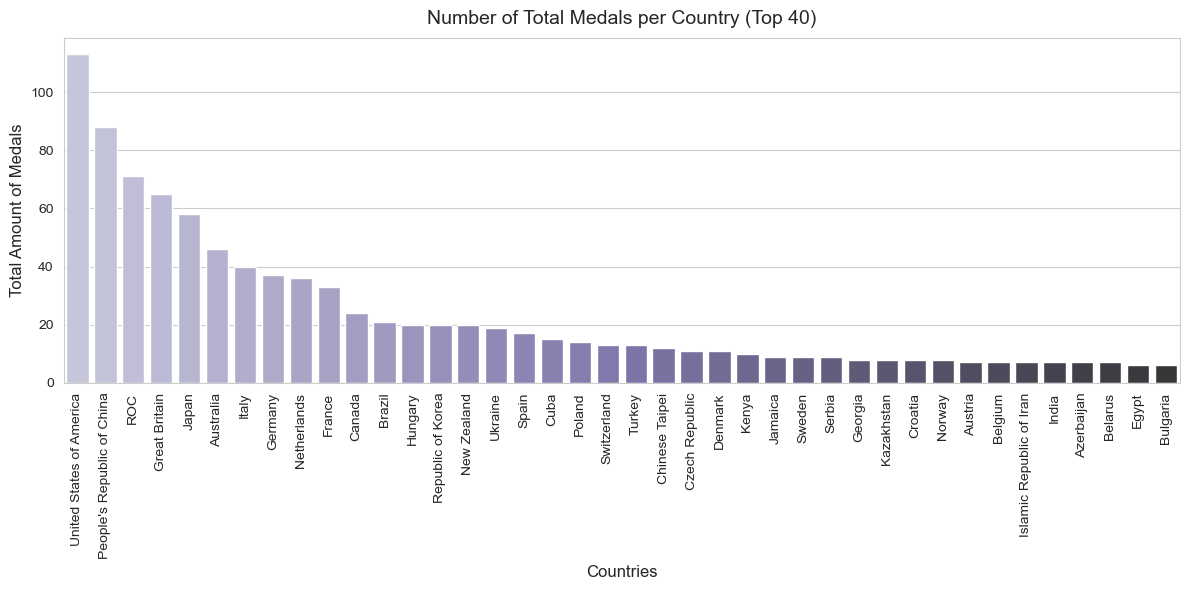

In [44]:
# Filter the top 40 countries by total medals
df_top40 = df.sort_values('total', ascending=False).head(40)

# Set the figure size
plt.figure(figsize=(12, 6))

# Order countries by total medals in decreasing order within the top 40
order = df_top40['country']

# Create the bar plot with total amount of medals for the top 40 countries
sns.barplot(data=df_top40, x='country', y='total', order=order, palette='Purples_d')

# Customize labels and title
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Total Amount of Medals', fontsize=12)
plt.title('Number of Total Medals per Country (Top 40)', fontsize=14, pad=10)
plt.xticks(rotation=90)

# Ensure all elements fit into the figure area
plt.tight_layout()

plt.show()


**Exploring the Relationship between Total Medal Count and Number of Athletes**

Results: Countries having higher amounts of athletes tend to win more medals

/var/folders/k9/pf_5mp0d6ng9y74z5ydlgz4c0000gn/T/ipykernel_44764/2509492188.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_top40['country'], rotation=90)


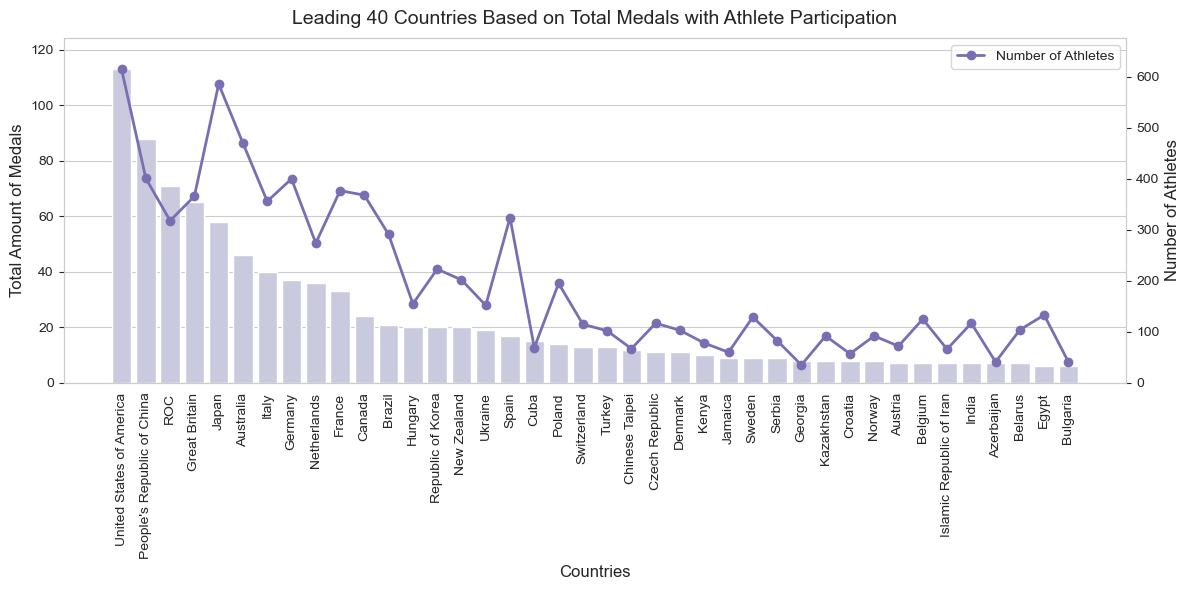

In [45]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Set the purple color palette
colors = sns.color_palette("Purples", 2)

# Create the bar plot 
ax1 = sns.barplot(data=df_top40, x='country', y='total', color=colors[0])

# Customize labels and title 
ax1.set_xlabel('Countries', fontsize=12)
ax1.set_ylabel('Total Amount of Medals', fontsize=12)
ax1.set_title('Leading 40 Countries Based on Total Medals with Athlete Participation', fontsize=14, pad=10)
ax1.set_xticklabels(df_top40['country'], rotation=90)

# Set y-axis limit for ax1 
ax1.set_ylim(0, df_top40['total'].max() * 1.1)  # Adjust multiplier as needed

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line graph for number of participants per country
ax2.plot(df_top40['country'], df_top40['athletes_count'], marker='o', color=colors[1], linewidth=2, label='Number of Athletes')

# Customize labels and title for the line plot
ax2.set_ylabel('Number of Athletes', fontsize=12)

# Set y-axis limit for ax2 (line plot)
ax2.set_ylim(0, df_top40['athletes_count'].max() * 1.1)  # Adjust multiplier as needed

# Add a legend for the line plot on the right
ax2.legend(loc='upper right')

# Ensure all elements fit into the figure area
plt.tight_layout()

# Set the background to be transparent
plt.gcf().set_facecolor('none')
plt.grid(False)

# Save the plot with transparent background
plt.savefig('plot.png', transparent=True)
plt.show()




**Visualize Relationship between Gold, Silver and Bronze Medals for Top 5 Countries**

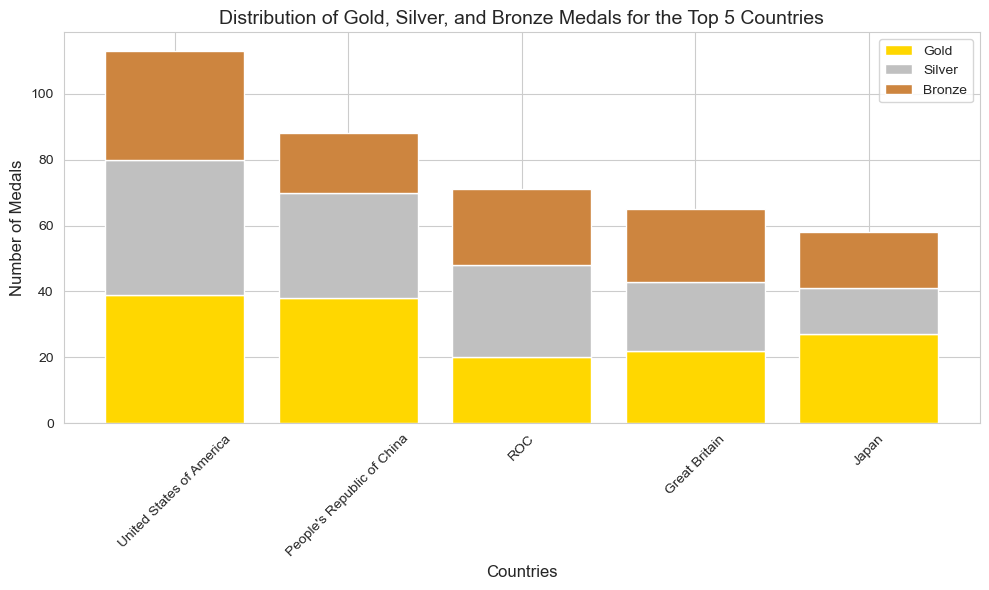

In [58]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Example data (replace with your actual data)
df_top5 = df.sort_values(by='total', ascending=False).head(5)

# Plot stacked bar plot
plt.bar(df_top5['country'], df_top5['gold'], label='Gold', color='gold')
plt.bar(df_top5['country'], df_top5['silver'], bottom=df_top5['gold'], label='Silver', color='silver')
plt.bar(df_top5['country'], df_top5['bronze'], bottom=df_top5['gold'] + df_top5['silver'], label='Bronze', color='peru')

# Customize labels and title
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.title('Distribution of Gold, Silver, and Bronze Medals for the Top 5 Countries', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()


**Checking for Collinearity in DataFrame**

Strong collinearity is denoted by number close to 1 or -1.
Values approaching 0 are considered not corrolated.

Result of graph:
- team count, athletes count, coaches count, gdp are features that are highly correlated to gold, silver and bronze medals

In [48]:
# Select only numeric columns
numeric_data = df[['gold', 'silver', 'bronze', 'team_count', 'athletes_count', 'coaches_count', 'gdp', 'gdpPerCapita', 'total_population']]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                      gold    silver    bronze  team_count  athletes_count  \
gold              1.000000  0.929046  0.862425    0.820460        0.839912   
silver            0.929046  1.000000  0.862646    0.794303        0.796216   
bronze            0.862425  0.862646  1.000000    0.893698        0.890906   
team_count        0.820460  0.794303  0.893698    1.000000        0.974634   
athletes_count    0.839912  0.796216  0.890906    0.974634        1.000000   
coaches_count     0.642015  0.563255  0.637258    0.774769        0.826977   
gdp               0.684362  0.766966  0.680568    0.577354        0.618560   
gdpPerCapita      0.272996  0.244419  0.303894    0.331190        0.316139   
total_population  0.147042  0.176570  0.172232    0.139304        0.178684   

                  coaches_count       gdp  gdpPerCapita  total_population  
gold                   0.642015  0.684362      0.272996          0.147042  
silver                 0.563255  0.766966      0.244419          0.

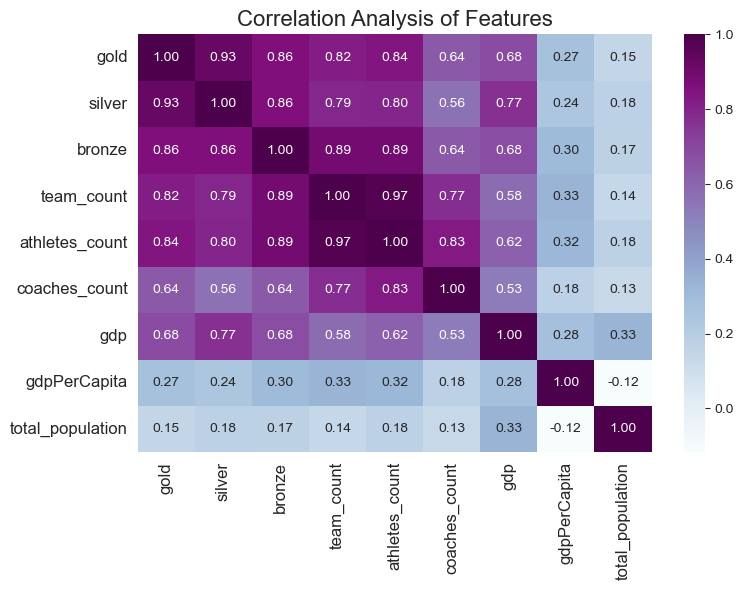

In [49]:
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', annot_kws={'size': 10})

# Set title with larger font size
heatmap.set_title('Correlation Analysis of Features', fontsize=16)

plt.yticks(rotation=0)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ensure full visibility of y-axis labels
plt.ylim(len(correlation_matrix), 0)

# Adjust whitespace around the heatmap
plt.tight_layout()

# Show the plot
plt.show()


**Dealing with Missing Data**

Some missing data to be dealt with

In [59]:
missing_values = df[['gold', 'silver', 'bronze', 'team_count', 'athletes_count', 'coaches_count', 'gdp']].isna().sum()
print(missing_values)

gold               0
silver             0
bronze             0
team_count        19
athletes_count     0
coaches_count     39
gdp                7
dtype: int64


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              93 non-null     int64  
 1   country           93 non-null     object 
 2   gold              93 non-null     int64  
 3   silver            93 non-null     int64  
 4   bronze            93 non-null     int64  
 5   total             93 non-null     int64  
 6   rank_total        93 non-null     int64  
 7   team_count        74 non-null     float64
 8   athletes_count    93 non-null     int64  
 9   coaches_count     54 non-null     float64
 10  population        86 non-null     float64
 11  id                86 non-null     float64
 12  gdp               86 non-null     float64
 13  unGDP             86 non-null     float64
 14  gdpPerCapita      86 non-null     float64
 15  continent         86 non-null     object 
 16  rank              86 non-null     float64
 17 

**Coaches count**

 Must be dropped as it is missing 42% of its data (100*39 / 93).

 **Teams count**

 Must perform data engineering as it is missing 20% of its data (100*19 / 93).

In [62]:
# Replace None values in the 'team_count' column with -999 as it is an outlier it will be detected as such
df['team_count'] = df['team_count'].fillna(-999)

**GDP values**

Since there are only a few instances, we can take the mean value.

In [64]:
# Replace None values in the mean value of gdp column
df['gdp'] = df['gdp'].fillna(df['gdp'].mean())

# Best ML Model for Medal Predictions

---







After testing different models like Neural Networks and Random Forest with grid search, it was discovered that Gradient Boosting Regressor significantly
increase the predictions' accuracy.

**Gradient Boosting Regressor**




In [65]:
# Prepare features and target
features = df[['team_count', 'athletes_count', 'gdp']]
target = df[['gold', 'silver', 'bronze']]


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# No change in the train-test split, keep 30% for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=101)

# Define parameter grid
params = {'n_estimators': 5000, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 2}

# Initialize the model
gbm_model = MultiOutputRegressor(GradientBoostingRegressor(**params))

# Train the model on the entire training set X_train and y_train
gbm_model.fit(X_train, y_train)


# Predictions and Evaluations

---

**Assessing Performance and Generalizability**

Mean Performance:
- The Cross-Validation Mean MAE of ~3.092 suggests that, on average, the predictions made by this model are off by about ~3 medals (small number).

Performance Consistency:
- The high standard deviation (~2.910) indicates that there is significant variability in the model's performance across different folds. This suggests that the model may be sensitive to the specific training data it receives, indicating potential instability. This number was worse for the Random Forest model.


In [ ]:
# Predictions on the test set
gbm_test_predictions = gbm_model.predict(X_test)

In [67]:
from sklearn.model_selection import cross_val_score

# Assuming gbm_model is your trained model and features, target are defined
scores = cross_val_score(gbm_model, features, target, scoring="neg_mean_absolute_error", cv=5)
mean_score = -scores.mean()
std_score = scores.std()

print(f"Cross-Validation Mean MAE: {mean_score}")
print(f"Cross-Validation Standard Deviation: {std_score}")


Cross-Validation Mean MAE: 3.0725947630220665
Cross-Validation Standard Deviation: 2.8724815238520334


In [69]:
'''Further Performance Metrics'''
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE for test data
mae_test_gold = mean_absolute_error(y_test['gold'], gbm_test_predictions[:, 0])
mae_test_silver = mean_absolute_error(y_test['silver'], gbm_test_predictions[:, 1])
mae_test_bronze = mean_absolute_error(y_test['bronze'], gbm_test_predictions[:, 2])

# Print the results
print(f"Mean Absolute Error for Gold Medals: {mae_test_gold}")
print(f"Mean Absolute Error for Silver Medals: {mae_test_silver}")
print(f"Mean Absolute Error for Bronze Medals: {mae_test_bronze}")
print()

# Calculate RMSE for test data
rmse_test_gold = np.sqrt(mean_squared_error(y_test['gold'], gbm_test_predictions[:, 0]))
rmse_test_silver = np.sqrt(mean_squared_error(y_test['silver'], gbm_test_predictions[:, 1]))
rmse_test_bronze = np.sqrt(mean_squared_error(y_test['bronze'], gbm_test_predictions[:, 2]))

# Print the results
print(f"Root Mean Squared Error for Gold Medals: {rmse_test_gold}")
print(f"Root Mean Squared Error for Silver Medals: {rmse_test_silver}")
print(f"Root Mean Squared Error for Bronze Medals: {rmse_test_bronze}")


Mean Absolute Error for Gold Medals: 4.174923315845931
Mean Absolute Error for Silver Medals: 4.438204581086741
Mean Absolute Error for Bronze Medals: 3.1554200353236914

Root Mean Squared Error for Gold Medals: 7.274003982393407
Root Mean Squared Error for Silver Medals: 7.835309206682467
Root Mean Squared Error for Bronze Medals: 4.878722305746767


**Store Predictions in File**

In [71]:

# Create a DataFrame with the country names and predictions
country_names = df.iloc[X_test.index]['country'].reset_index(drop=True)
predictions_df = pd.DataFrame(gbm_test_predictions, columns=['predicted_gold', 'predicted_silver', 'predicted_bronze'])
result_df = pd.concat([country_names, predictions_df], axis=1)

# Save the DataFrame to a CSV file
file_path = 'data_olympics/predicted_medals.csv'
result_df.to_csv(file_path, index=False)

print("Predicted medal counts have been saved to predicted_medals.csv")

Predicted medal counts have been saved to predicted_medals.csv


**Calculate Ranks**

---


2 Methods:
1. Calculate ranks based on total medals, meaning weights of 1 for all three medals
2. Calculate ranks based on exponential weighted point system (4:2:1) — gold 4 points, silver 2 points, and bronze 1 point

In [72]:
'''Method 1: Rank Based on Total Medals'''

# Calculate total predicted medals
result_df['total_medals'] = result_df['predicted_gold'] + result_df['predicted_silver'] + result_df['predicted_bronze']

# Rank countries based on total medals
result_df['rank_by_medals'] = result_df['total_medals'].rank(method='min', ascending=False)

# Sort by rank for clarity
result_df.sort_values(by='rank_by_medals', inplace=True)

# Display the results with country, rank, and total medals
print("Ranking based on Total Medals:")
print(result_df[['country', 'rank_by_medals', 'total_medals']])


Ranking based on Total Medals:
                       country  rank_by_medals  total_medals
18                       Japan             1.0    113.000000
13  People's Republic of China             2.0     30.110785
1                  Netherlands             3.0     28.389623
11                       India             4.0     27.353932
8                        Spain             5.0     24.699355
12               Great Britain             6.0     23.025717
15                      Poland             7.0     22.113079
2                 South Africa             8.0     20.449800
5                    Argentina             9.0     15.609351
20                       Egypt            10.0     15.371646
9                       Mexico            11.0     15.300021
24                     Hungary            12.0     13.439722
25                 Switzerland            13.0     11.886221
10                     Ukraine            14.0     10.981165
16                     Romania            15.0     10.

In [73]:
# Calculate weighted points based on the 4:2:1 system
result_df['weighted_points'] = 4 * result_df['predicted_gold'] + 2 * result_df['predicted_silver'] + 1 * result_df['predicted_bronze']

# Rank countries based on weighted points
result_df['rank_by_points'] = result_df['weighted_points'].rank(method='min', ascending=False)

# Sort by rank for clarity
result_df.sort_values(by='rank_by_points', inplace=True)

# Display the results
print("Ranking based on Weighted Points (4:2:1 system):")
print(result_df[['country', 'rank_by_points','weighted_points']])


Ranking based on Weighted Points (4:2:1 system):
                       country  rank_by_points  weighted_points
18                       Japan             1.0       271.000000
11                       India             2.0        66.585116
13  People's Republic of China             3.0        66.282551
1                  Netherlands             4.0        62.500212
8                        Spain             5.0        55.990481
2                 South Africa             6.0        51.026230
12               Great Britain             7.0        50.830285
15                      Poland             8.0        50.020504
5                    Argentina             9.0        39.315147
20                       Egypt            10.0        36.960884
9                       Mexico            11.0        32.199067
24                     Hungary            12.0        31.053291
10                     Ukraine            13.0        25.157391
25                 Switzerland            14.0        2

# Conclusion

---

Based on the 2021 Olympic Dataset, our predictive model forecasts that the USA will emerge as the top performer with the highest total medal count. Following the USA, China and Russia are predicted to secure the next positions based on their performance.

Our model was trained on the 2021 data and is now prepared to make predictions for the upcoming events. It achieved Mean Absolute Errors of 4.0, 4.7, and 3.1 for Gold, Silver, and Bronze Medals respectively. These metrics reflect the average magnitude of errors in our predictions, indicating our model's capability in forecasting medal outcomes with reasonable accuracy based on historical data.
